In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read all patterns

patterns = {
    'Cat Pattern': cv2.imread('cat_pattern.png', cv2.IMREAD_GRAYSCALE),
    'Double Triangle Pattern': cv2.imread('double_triangle_pattern.png', cv2.IMREAD_GRAYSCALE),
    'Duck Pattern': cv2.imread('duck_pattern.png', cv2.IMREAD_GRAYSCALE),
    'Fence Pattern': cv2.imread('fence_pattern.png', cv2.IMREAD_GRAYSCALE)
}

images = {
    'Cat Image': cv2.imread('cat_image.png', cv2.IMREAD_GRAYSCALE),
    'Double Triangle Image': cv2.imread('double_triangle_image.png', cv2.IMREAD_GRAYSCALE),
    'Duck Image': cv2.imread('duck_image.png', cv2.IMREAD_GRAYSCALE),
    'Fence Image': cv2.imread('fence_image.png', cv2.IMREAD_GRAYSCALE)
}

def calculate_mse(img1, img2):
    return np.mean((img1 - img2) ** 2)

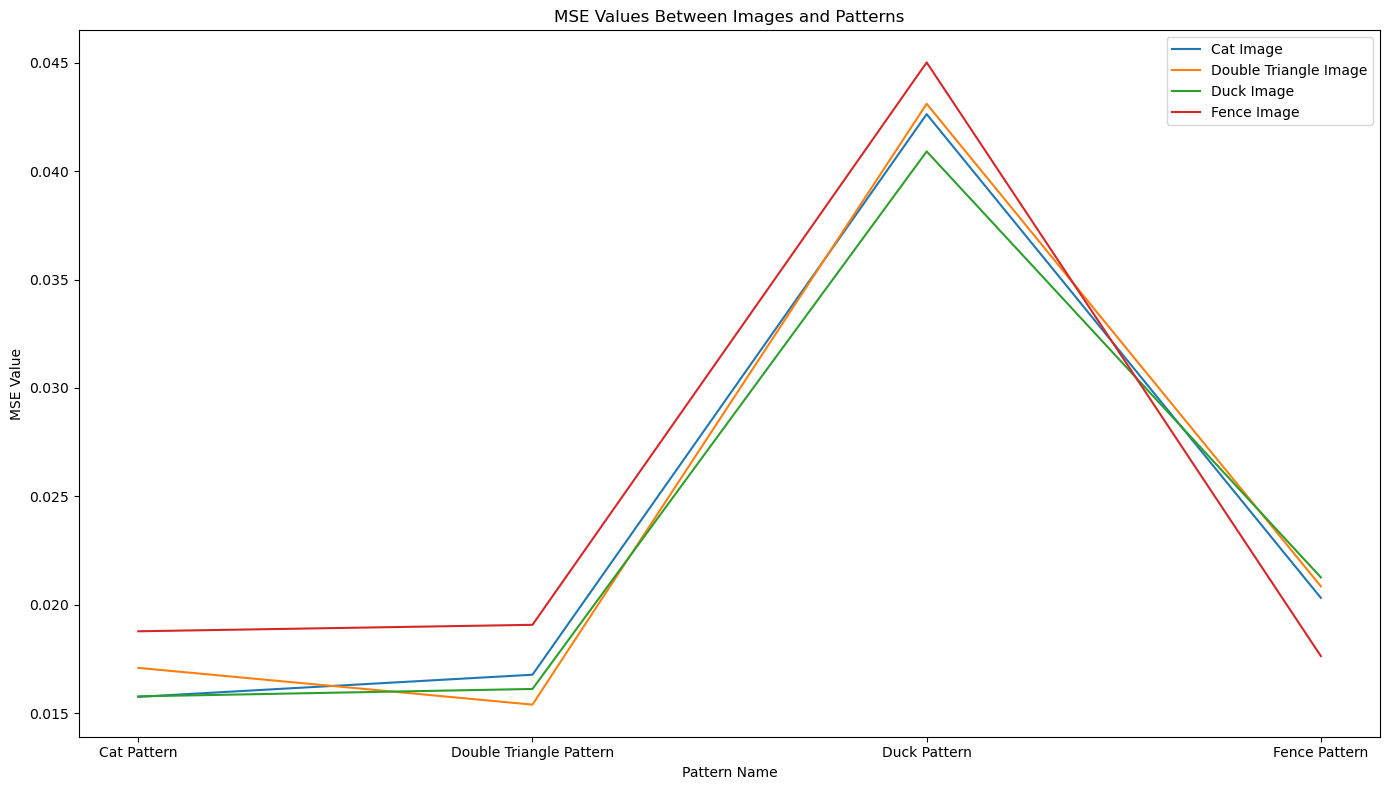

{'Cat Image': {'Cat Pattern': 0.01575772, 'Double Triangle Pattern': 0.01677725, 'Duck Pattern': 0.042624496, 'Fence Pattern': 0.020320075}, 'Double Triangle Image': {'Cat Pattern': 0.017093059, 'Double Triangle Pattern': 0.015399122, 'Duck Pattern': 0.043101862, 'Fence Pattern': 0.02085344}, 'Duck Image': {'Cat Pattern': 0.015778737, 'Double Triangle Pattern': 0.016120715, 'Duck Pattern': 0.04090539, 'Fence Pattern': 0.021266006}, 'Fence Image': {'Cat Pattern': 0.018780323, 'Double Triangle Pattern': 0.01907831, 'Duck Pattern': 0.045007993, 'Fence Pattern': 0.017636126}}


In [3]:
# Collect all MSE values
mse_values = {}

# Iterate over all combinations of images and patterns
for image_name, image in images.items():
    mse_values[image_name] = {}
    for pattern_name, pattern in patterns.items():
        # Check if both images are the same size, if not, resize
        if image.shape != pattern.shape:
            resized_image = cv2.resize(image, (pattern.shape[1], pattern.shape[0]))
        else:
            resized_image = image
        
        # Normalize the images for better effect in visualization
        pattern_norm = cv2.normalize(pattern, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        image_norm = cv2.normalize(resized_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        # Calculate MSE and store it
        mse_value = calculate_mse(image_norm, pattern_norm)
        mse_values[image_name][pattern_name] = mse_value

# Now let's plot the MSE values
fig, ax = plt.subplots(figsize=(14, 8))
for image_name, pattern_mse in mse_values.items():
    ax.plot(pattern_mse.keys(), pattern_mse.values(), label=image_name)

ax.set_xlabel('Pattern Name')
ax.set_ylabel('MSE Value')
ax.set_title('MSE Values Between Images and Patterns')
ax.legend()
plt.tight_layout() 
plt.show()

print(mse_values)